In [37]:
import pandas as pd

misclassification = pd.read_csv("misclassification_analysis_cnn.csv")
business_data = pd.read_csv("../4-prep_model_data/data_filtered.csv")

In [38]:
misclassification.head()

,business_id,Review_Text,True_Star_Rating,Predicted_Star_Rating,Is_Misclassified
0,V7IHpr1xzFIf_jp876HoAw,I didn't get the opportunity to drop in to the...,4,3,True
1,V7IHpr1xzFIf_jp876HoAw,I was not a fan of burger king is previous yea...,5,4,True
2,V7IHpr1xzFIf_jp876HoAw,Ive now move to edmonton and learnt the burger...,5,3,True
3,V7IHpr1xzFIf_jp876HoAw,Great value for their king meals on Wednesday....,3,3,False
4,s9G06FPW74Prlp8s1h5nEA,Amazing sushi and great service. Would definit...,5,4,True


In [39]:
business_data.head()

,business_id,name,state_x,stars,review_count,OutdoorSeating,RestaurantsDelivery,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,...,has_exclamation,has_question,uppercase_ratio,is_shouting,length,food_sentiment,service_sentiment,atmosphere_sentiment,overall_sentiment,grade_level
0,zxJfzu6Hy4E5bjP9fzh93g,Nikki's,AB,4.0,8,0,0,0,0,0,...,False,False,0.027027,False,148,Neutral,Neutral,Positive,NEGATIVE,3.256667
1,zxJfzu6Hy4E5bjP9fzh93g,Nikki's,AB,4.0,8,0,0,0,0,0,...,False,False,0.029630,False,135,Positive,Positive,Positive,POSITIVE,3.304348
2,zxJfzu6Hy4E5bjP9fzh93g,Nikki's,AB,4.0,8,0,0,0,0,0,...,True,False,0.017153,False,583,Positive,Positive,Positive,POSITIVE,7.329091
3,zxJfzu6Hy4E5bjP9fzh93g,Nikki's,AB,4.0,8,0,0,0,0,0,...,True,False,0.021505,False,186,Positive,Positive,Positive,POSITIVE,2.997778
4,zxJfzu6Hy4E5bjP9fzh93g,Nikki's,AB,4.0,8,0,0,0,0,0,...,True,False,0.016871,False,652,Positive,Positive,Positive,NEGATIVE,6.235518


In [40]:
misclassification["business_id"] = misclassification["business_id"].map(str).str.strip()
business_data["business_id"] = business_data["business_id"].map(str).str.strip()


In [41]:
print(misclassification["business_id"].apply(type).value_counts())
print(business_data["business_id"].apply(type).value_counts())


business_id
<class 'str'>    8629
Name: count, dtype: int64
business_id
<class 'str'>    46457
Name: count, dtype: int64


In [42]:
print(misclassification["business_id"].dtype)
print(business_data["business_id"].dtype)

print(misclassification["business_id"].apply(lambda x: type(x)).unique())
print(business_data["business_id"].apply(lambda x: type(x)).unique())


object
object
[<class 'str'>]
[<class 'str'>]


In [60]:
merged = misclassification.merge(business_data, left_on=["business_id", "Review_Text"], right_on=["business_id", "text"], how="inner")

In [61]:
merged.columns

Index(['business_id', 'Review_Text', 'True_Star_Rating',
       'Predicted_Star_Rating', 'Is_Misclassified', 'name', 'state_x', 'stars',
       'review_count', 'OutdoorSeating',
       ...
       'has_exclamation', 'has_question', 'uppercase_ratio', 'is_shouting',
       'length', 'food_sentiment', 'service_sentiment', 'atmosphere_sentiment',
       'overall_sentiment', 'grade_level'],
      dtype='object', length=187)

In [62]:
relevant = merged[["business_id", "Review_Text", "True_Star_Rating", "Predicted_Star_Rating", "Is_Misclassified", "food_sentiment", "service_sentiment", "atmosphere_sentiment", "overall_sentiment", "grade_level"]]

In [63]:
relevant

,business_id,Review_Text,True_Star_Rating,Predicted_Star_Rating,Is_Misclassified,food_sentiment,service_sentiment,atmosphere_sentiment,overall_sentiment,grade_level
0,V7IHpr1xzFIf_jp876HoAw,I didn't get the opportunity to drop in to the...,4,3,True,Neutral,Positive,Positive,POSITIVE,9.082540
1,V7IHpr1xzFIf_jp876HoAw,I was not a fan of burger king is previous yea...,5,4,True,Positive,Positive,Positive,POSITIVE,6.169975
2,V7IHpr1xzFIf_jp876HoAw,Ive now move to edmonton and learnt the burger...,5,3,True,Positive,Positive,Positive,POSITIVE,5.912893
3,V7IHpr1xzFIf_jp876HoAw,Great value for their king meals on Wednesday....,3,3,False,Neutral,Neutral,Positive,POSITIVE,4.383824
4,s9G06FPW74Prlp8s1h5nEA,Amazing sushi and great service. Would definit...,5,4,True,Neutral,Positive,Positive,POSITIVE,11.045000
...,...,...,...,...,...,...,...,...,...,...
8652,pJv2Xu4yfFeUBiAGY95Feg,I actually have no words to describe how bad t...,1,0,True,Negative,Negative,Negative,NEGATIVE,3.650000
8653,pJv2Xu4yfFeUBiAGY95Feg,I rarely ever write reviews. But I needed to a...,1,0,True,Negative,Negative,Negative,NEGATIVE,5.061505
8654,pJv2Xu4yfFeUBiAGY95Feg,WORST PLACE EVER !!!!!!!!! No stars should be ...,1,0,True,Negative,Negative,Negative,NEGATIVE,1.890588
8655,pJv2Xu4yfFeUBiAGY95Feg,Please whatever you do do not order from this ...,1,0,True,Negative,Negative,Negative,NEGATIVE,11.583030


In [64]:
sent_map = {
    "Negative": -1,
    "Neutral": 0,
    "Positive": 1
}

overall_map = {
    "NEGATIVE": -1,
    "NEUTRAL": 0,
    "POSITIVE": 1
}

relevant.loc[:, "food_sentiment"] = relevant["food_sentiment"].map(sent_map)
relevant.loc[:, "service_sentiment"] = relevant["service_sentiment"].map(sent_map)
relevant.loc[:, "atmosphere_sentiment"] = relevant["atmosphere_sentiment"].map(sent_map)
relevant.loc[:, "overall_sentiment"] = relevant["overall_sentiment"].map(overall_map)


In [69]:
relevant.loc[:, 'grade_level'] = relevant['grade_level'].round().astype(int)


In [70]:
relevant

,business_id,Review_Text,True_Star_Rating,Predicted_Star_Rating,Is_Misclassified,food_sentiment,service_sentiment,atmosphere_sentiment,overall_sentiment,grade_level
0,V7IHpr1xzFIf_jp876HoAw,I didn't get the opportunity to drop in to the...,4,3,True,0,1,1,1,9
1,V7IHpr1xzFIf_jp876HoAw,I was not a fan of burger king is previous yea...,5,4,True,1,1,1,1,6
2,V7IHpr1xzFIf_jp876HoAw,Ive now move to edmonton and learnt the burger...,5,3,True,1,1,1,1,6
3,V7IHpr1xzFIf_jp876HoAw,Great value for their king meals on Wednesday....,3,3,False,0,0,1,1,4
4,s9G06FPW74Prlp8s1h5nEA,Amazing sushi and great service. Would definit...,5,4,True,0,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...
8652,pJv2Xu4yfFeUBiAGY95Feg,I actually have no words to describe how bad t...,1,0,True,-1,-1,-1,-1,4
8653,pJv2Xu4yfFeUBiAGY95Feg,I rarely ever write reviews. But I needed to a...,1,0,True,-1,-1,-1,-1,5
8654,pJv2Xu4yfFeUBiAGY95Feg,WORST PLACE EVER !!!!!!!!! No stars should be ...,1,0,True,-1,-1,-1,-1,2
8655,pJv2Xu4yfFeUBiAGY95Feg,Please whatever you do do not order from this ...,1,0,True,-1,-1,-1,-1,12


In [73]:
sent_cols = ["food_sentiment", "service_sentiment", "atmosphere_sentiment", "overall_sentiment"]
relevant.loc[:, sent_cols] = relevant[sent_cols].round().astype(int)

# Filter for misclassified
misclassified = relevant[relevant["Is_Misclassified"] == True]


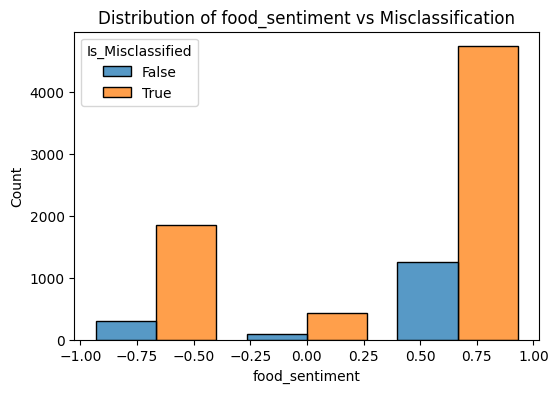

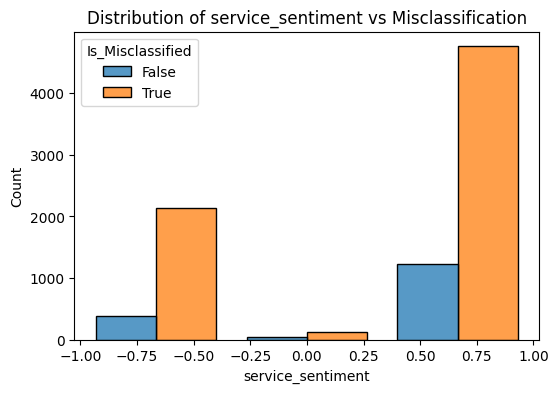

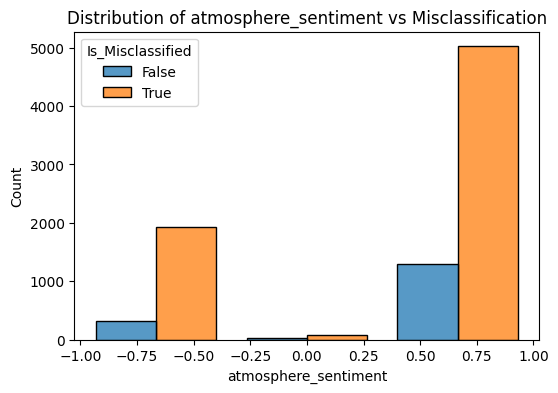

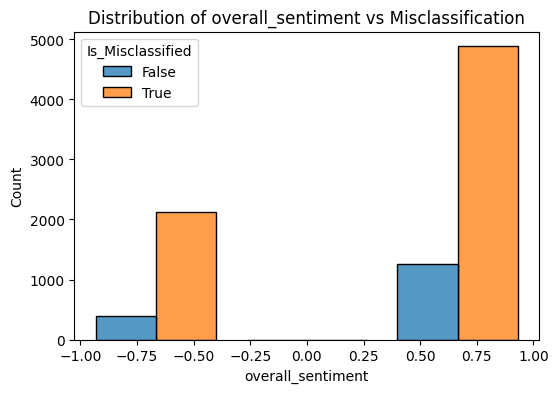

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in sent_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=relevant, x=col, hue="Is_Misclassified", multiple="dodge", shrink=0.8, bins=3)
    plt.title(f"Distribution of {col} vs Misclassification")
    plt.show()


In [77]:
# Convert boolean misclassification to int
relevant.loc[:, "Is_Misclassified_int"] = relevant["Is_Misclassified"].astype(int)

for col in sent_cols:
    corr = relevant[col].corr(relevant["Is_Misclassified_int"])
    print(f"Correlation between {col} and misclassification: {corr:.3f}")


Correlation between food_sentiment and misclassification: -0.074
Correlation between service_sentiment and misclassification: -0.059
Correlation between atmosphere_sentiment and misclassification: -0.067
Correlation between overall_sentiment and misclassification: -0.059


In [78]:
from sklearn.linear_model import LogisticRegression

X = relevant[sent_cols]
y = relevant["Is_Misclassified_int"]

model = LogisticRegression()
model.fit(X, y)

for col, coef in zip(sent_cols, model.coef_[0]):
    print(f"{col}: {coef:.3f}")


food_sentiment: -0.178
service_sentiment: 0.011
atmosphere_sentiment: -0.064
overall_sentiment: -0.019


In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

def analyze_misclassification_aspects(df, sentiment_cols, misclassified_col="Is_Misclassified"):
    """
    Analyze which aspect sentiments are most associated with misclassification.

    Parameters:
    - df: DataFrame containing the data
    - sentiment_cols: list of columns for aspect sentiments (numeric)
    - misclassified_col: column indicating misclassification (bool)
    
    Returns:
    - DataFrame ranking aspects by correlation and logistic regression coefficient
    """

    df = df.copy()
    
    # Ensure sentiments are numeric integers
    df[sentiment_cols] = df[sentiment_cols].round().astype(int)
    
    # Convert misclassification to int
    df["misclassified_int"] = df[misclassified_col].astype(int)

    results = []

    # Correlation analysis
    for col in sentiment_cols:
        corr = df[col].corr(df["misclassified_int"])
        results.append({"Aspect": col, "Correlation": corr})
    
    # Logistic regression
    X = df[sentiment_cols]
    y = df["misclassified_int"]
    
    logreg = LogisticRegression()
    logreg.fit(X, y)
    
    for i, col in enumerate(sentiment_cols):
        results[i]["LogReg_Coeff"] = logreg.coef_[0][i]
    
    results_df = pd.DataFrame(results)
    results_df["Abs_Correlation"] = results_df["Correlation"].abs()
    results_df = results_df.sort_values(by="Abs_Correlation", ascending=False).reset_index(drop=True)
    
    return results_df

# Example usage:
sent_cols = ["food_sentiment", "service_sentiment", "atmosphere_sentiment", "overall_sentiment"]
ranking = analyze_misclassification_aspects(relevant, sent_cols)
print(ranking)
print("Higher absolute LogReg Coeff = stronger effect on misclassification")
print("Higher absolute Correlation = stronger effect on misclassification")


                 Aspect  Correlation  LogReg_Coeff  Abs_Correlation
0        food_sentiment    -0.074113     -0.177725         0.074113
1  atmosphere_sentiment    -0.067398     -0.063787         0.067398
2     service_sentiment    -0.059293      0.010792         0.059293
3     overall_sentiment    -0.059193     -0.018767         0.059193
Higher absolute LogReg Coeff = stronger effect on misclassification
Higher absolute Correlation = stronger effect on misclassification


In [135]:
# Assuming 'relevant' is your DataFrame with the sample columns
aspects = ["food_sentiment", "service_sentiment", "atmosphere_sentiment", "overall_sentiment"]
summary_rows = []

for aspect in aspects:
    misclassification_rates = relevant.groupby(aspect)["Is_Misclassified"].mean()
    for sentiment_value, rate in misclassification_rates.items():
        summary_rows.append({
            "Aspect": aspect,
            "Sentiment": sentiment_value,
            "Misclassification_Rate": rate
        })

misclass_table = pd.DataFrame(summary_rows)
misclass_table = misclass_table.sort_values(by="Misclassification_Rate", ascending=False)
misclass_table

,Aspect,Sentiment,Misclassification_Rate
0,food_sentiment,-1,0.858927
6,atmosphere_sentiment,-1,0.855744
3,service_sentiment,-1,0.847869
9,overall_sentiment,-1,0.846582
1,food_sentiment,0,0.824219
5,service_sentiment,1,0.795622
10,overall_sentiment,1,0.795473
8,atmosphere_sentiment,1,0.794746
2,food_sentiment,1,0.791576
7,atmosphere_sentiment,0,0.771739


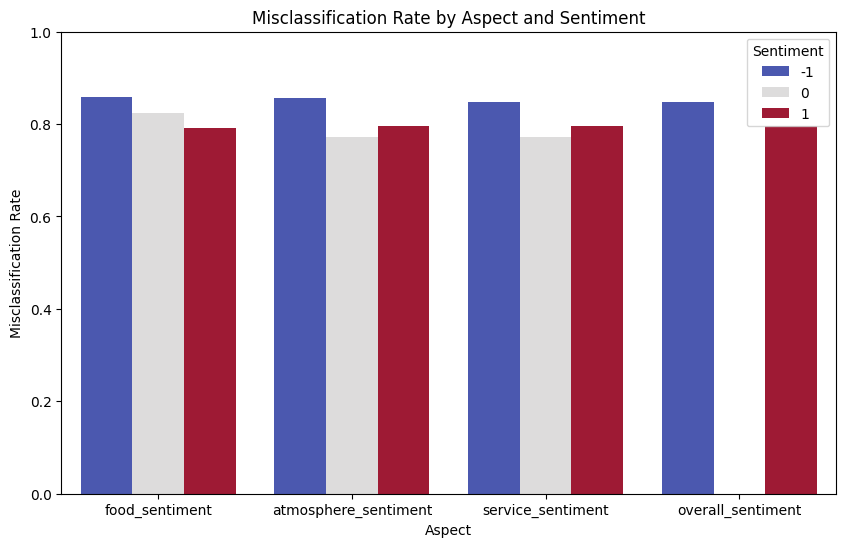

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(misclass_table)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Aspect", y="Misclassification_Rate", hue="Sentiment", palette="coolwarm")
plt.title("Misclassification Rate by Aspect and Sentiment")
plt.ylabel("Misclassification Rate")
plt.xlabel("Aspect")
plt.ylim(0, 1)
plt.legend(title="Sentiment", loc="upper right")
plt.show()


In [102]:
relevant[relevant["grade_level"] == 0]["Review_Text"].iloc[7]

'I just called and I think they are closed.'

    grade_level  Misclassification_Rate
1             0                1.000000
17           16                1.000000
18           17                1.000000
27           27                1.000000
28           31                1.000000
30           45                1.000000
31           49                1.000000
23           22                1.000000
34           71                1.000000
32           60                1.000000
33           68                1.000000
24           24                1.000000
22           21                1.000000
25           25                1.000000
13           12                0.868421
4             3                0.850370
5             4                0.826531
3             2                0.825758
12           11                0.825000
11           10                0.821429
8             7                0.816563
2             1                0.805195
9             8                0.803689
6             5                0.799637


C:\Users\Serena Wong\AppData\Local\Temp\ipykernel_18820\688916100.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_misclass, x="grade_level", y="Misclassification_Rate", palette="viridis")


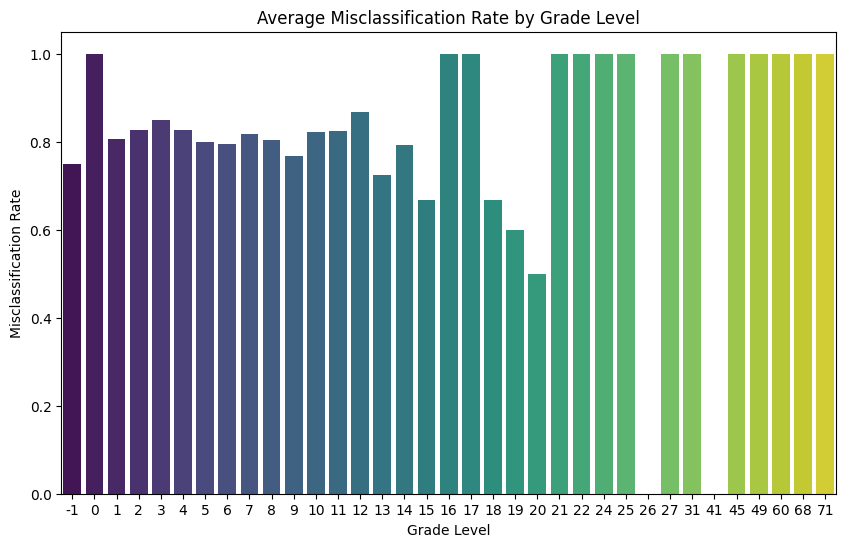

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'relevant'
# Calculate average misclassification rate per grade level
grade_misclass = relevant.groupby("grade_level")["Is_Misclassified"].mean().reset_index()
grade_misclass.rename(columns={"Is_Misclassified": "Misclassification_Rate"}, inplace=True)

print(grade_misclass.sort_values(by="Misclassification_Rate", ascending=False))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=grade_misclass, x="grade_level", y="Misclassification_Rate", palette="viridis")
plt.title("Average Misclassification Rate by Grade Level")
plt.xlabel("Grade Level")
plt.ylabel("Misclassification Rate")
plt.show()


In [129]:
relevant['aspect_combo'] = list(zip(
    relevant['food_sentiment'],
    relevant['service_sentiment'],
    relevant['atmosphere_sentiment'],
    relevant['overall_sentiment']
))


combo_summary = relevant.groupby('aspect_combo').agg(
    total_reviews=('Is_Misclassified', 'count'),
    misclassified=('Is_Misclassified', 'sum')
).reset_index()

combo_summary.loc[:, 'misclassification_rate'] = combo_summary['misclassified'] / combo_summary['total_reviews']
combo_summary = combo_summary.sort_values(by='misclassification_rate', ascending=False)


C:\Users\Serena Wong\AppData\Local\Temp\ipykernel_18820\3280429218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant['aspect_combo'] = list(zip(


In [130]:
# Example: food positive, overall positive, service & atmosphere negative
pattern = (1, -1, -1, 1)
pattern_df = combo_summary[combo_summary['aspect_combo'] == pattern]
print(pattern_df)


      aspect_combo  total_reviews  misclassified  misclassification_rate
34  (1, -1, -1, 1)             70             48                0.685714


In [131]:
combo_summary

,aspect_combo,total_reviews,misclassified,misclassification_rate
7,"(-1, 0, 0, -1)",2,2,1.000000
13,"(-1, 1, 0, 1)",1,1,1.000000
5,"(-1, 0, -1, -1)",2,2,1.000000
12,"(-1, 1, 0, -1)",1,1,1.000000
9,"(-1, 0, 1, 1)",2,2,1.000000
30,"(0, 1, 0, 1)",13,13,1.000000
29,"(0, 1, 0, -1)",2,2,1.000000
22,"(0, 0, -1, -1)",1,1,1.000000
18,"(0, -1, 0, -1)",7,7,1.000000
36,"(1, -1, 0, 1)",2,2,1.000000


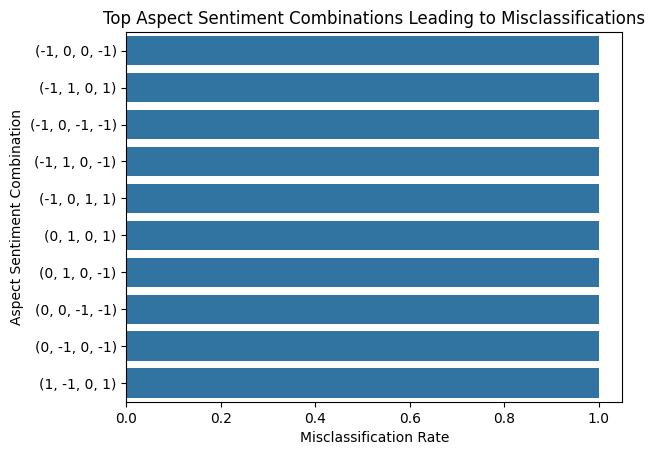

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

top_combos = combo_summary.head(10).copy()
top_combos['aspect_combo_str'] = top_combos['aspect_combo'].apply(lambda x: str(x))

sns.barplot(
    x='misclassification_rate', 
    y='aspect_combo_str', 
    data=top_combos
)
plt.xlabel('Misclassification Rate')
plt.ylabel('Aspect Sentiment Combination')
plt.title('Top Aspect Sentiment Combinations Leading to Misclassifications')
plt.show()

